# Risk Framework — Quality vs Market Expectation Misalignment

This notebook defines a risk framework to quantify latent business risk arising from misalignment between technical wine quality and market expectations.

The framework combines outputs from:
- Model 1: Technical Quality
- Model 2: Market Expectation (price-adjusted)

The objective is to detect hidden risk before market consequences materialize.


## 1. Risk components

Risk is defined as the divergence between:
- Technical quality (what the wine objectively delivers)
- Market expectation (what consumers expect, largely driven by price)

A positive gap indicates overpricing risk.
A negative gap indicates potential undervaluation.


In [2]:
#Risk Score = scaled( Market Expectation − Technical Quality )


## 2. Risk score definition

The Risk Score is defined as a normalized measure of misalignment between expected market perception and technical quality.

- Score range: 0 (low risk) to 100 (high risk)
- Higher values indicate greater overvaluation risk
- Lower values indicate alignment or potential undervaluation


In [4]:
import pandas as pd
import numpy as np


In [5]:
np.random.seed(42)

technical_quality = np.random.normal(loc=0, scale=1, size=1000)
market_expectation = np.random.normal(loc=0.3, scale=1, size=1000)

risk_raw = market_expectation - technical_quality

risk_score = 100 * (risk_raw - risk_raw.min()) / (risk_raw.max() - risk_raw.min())

risk_df = pd.DataFrame({
    "technical_quality": technical_quality,
    "market_expectation": market_expectation,
    "risk_score": risk_score
})

risk_df.head()


,technical_quality,market_expectation,risk_score
0,0.496714,1.699355,59.765105
1,-0.138264,1.224634,61.673583
2,0.647689,0.359630,42.012545
3,1.523030,-0.346937,23.173788
4,-0.234153,0.998223,60.119221


## 3. Risk segmentation

To support decision-making, the continuous risk score is grouped into three actionable segments:
- Low Risk
- Medium Risk
- High Risk


In [6]:
def risk_segment(score):
    if score < 33:
        return "Low Risk"
    elif score < 66:
        return "Medium Risk"
    else:
        return "High Risk"

risk_df["risk_segment"] = risk_df["risk_score"].apply(risk_segment)

risk_df["risk_segment"].value_counts()


risk_segment
Medium Risk    651
Low Risk       176
High Risk      173
Name: count, dtype: int64

## 4. Business interpretation

- High Risk wines are priced above what their technical quality can sustainably support.
- Market perception may remain positive in the short term, masking future demand erosion.
- Medium Risk wines require close monitoring and potential pricing or positioning adjustments.
- Low Risk wines are aligned or undervalued, offering strategic stability or opportunity.

This framework enables proactive decision-making before delayed market feedback materializes.


## 5. Risk score distribution

To better understand how risk is distributed across scenarios, we visualize the continuous risk score.
This helps identify concentration zones and supports the definition of actionable risk segments.


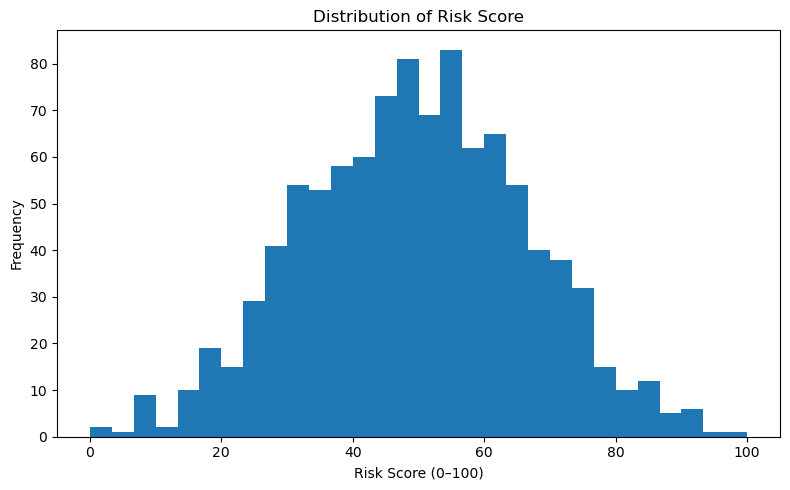

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.hist(risk_df["risk_score"], bins=30)
plt.xlabel("Risk Score (0–100)")
plt.ylabel("Frequency")
plt.title("Distribution of Risk Score")

plt.tight_layout()
plt.show()


## 6. Refining risk segmentation

While a three-level risk classification is useful, a four-level segmentation provides better granularity for strategic decision-making.

In particular, it allows us to distinguish between moderate misalignment and structurally high-risk situations.


## 7. Four-level risk segmentation

The continuous risk score is segmented into four categories to support prioritization and action planning:
- Low Risk
- Medium Risk
- Medium–High Risk
- High Risk


In [8]:
def risk_segment_4(score):
    if score < 25:
        return "Low Risk"
    elif score < 50:
        return "Medium Risk"
    elif score < 75:
        return "Medium-High Risk"
    else:
        return "High Risk"

risk_df["risk_segment_4"] = risk_df["risk_score"].apply(risk_segment_4)

risk_df["risk_segment_4"].value_counts()


risk_segment_4
Medium Risk         437
Medium-High Risk    428
Low Risk             70
High Risk            65
Name: count, dtype: int64

## 8. Risk segments distribution

The distribution of scenarios across risk segments highlights where most potential misalignment lies.
This view is particularly useful for executive-level discussions.


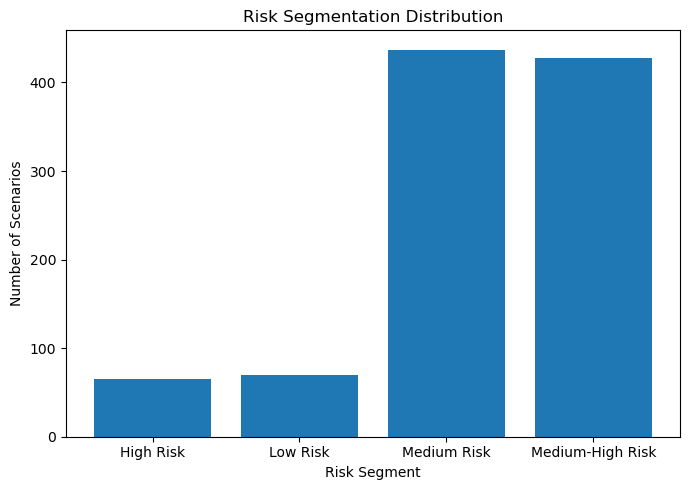

In [9]:
segment_counts = risk_df["risk_segment_4"].value_counts().sort_index()

plt.figure(figsize=(7, 5))

plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel("Risk Segment")
plt.ylabel("Number of Scenarios")
plt.title("Risk Segmentation Distribution")

plt.tight_layout()
plt.show()


## 9. Business interpretation of risk segments

- **Low Risk** wines show strong alignment between technical quality and market expectations, offering stability or growth potential.
- **Medium Risk** wines operate within acceptable misalignment levels but should be monitored.
- **Medium–High Risk** wines exhibit growing structural risk and may require pricing or positioning adjustments.
- **High Risk** wines are exposed to delayed negative market feedback and represent a strategic priority for intervention.

This segmentation enables proactive risk management rather than reactive damage control.
